# Machine Learning (CMP3751M/CMP9772M) - Assessment 02

Through the following notebook, you will be analysing a dataset and fitting a classification model to this dataset.

The assessment is structured as follows:
- [Dataset description](#Dataset-description)
- [Loading the dataset](#Loading-the-dataset)
- [Simple classification model](#Simple-classification-model)
    - [Creating a training and testing set](#Creating-a-training-and-testing-set)
    - [Training a classifier](#Training-a-classifier)
- [Improved evaluation strategy](#Improved-evaluation-strategy)
- [Different models and parameter search](#Different-models-and-parameter-search)
- [Ensembles](#Ensembles)
- [Final model evaluation](#Final-model-evaluation)
- [References](#References)

**Notes:**
- The (%) noted above are out of 100; this will be scaled down to **maximum of 60 marks** for the assessment **(or maximum of 50 marks for CMP9772M)** .
- Any discussion not supported by your implementation will not be awarded marks.
- **Do not modify** and code provided as a **TESTING CELL**.
- Make sure to **fix all the random seeds** in any parts of your solution, so it can be reproduced exactly.
- The notebook, as provided, runs without errors (without solving the assessment). Make sure that the solution, or the partial solution, you hand in, also **runs without errors** on the data provided. If you have a partial solution causing errors which you would like to show, please include it as a comment.
- Take care to include references to any external sources used. Check the [References](#References) section, the below cell, and the exambles through the assessment text for examples of how to do this.


In [1]:
# Remember to reference your sources! Check the bottom of the file, and examples used in the text of the assessment,
# for including references to papers and software in your textual answers

# Also add a reference in your solution cell before defining a class/function/method, eg.:

# This code is a modified and extended version of [2]
# OR
# This code is a modified and extended version of https://stackoverflow.com/q/522563/884412
##############
## THE CODE ##
##############

## Dataset description

The the assessment will be done on the dataset containing only numerical features describing the physical and chemical properties of the Li-ion battery, which can be classified on the basis of their crystal system [1]. (The dataset for this assessment has been adapted from the full dataset which can be found [here](https://www.kaggle.com/datasets/divyansh22/crystal-system-properties-for-liion-batteries), shared in the public domain by Divyansh Agrawal).

Each sample corresponds to the properties of a battery, and consists of following features:

| Feature Name      | Value | Description |
| :---------------- | :----- | ----------- |
| `Formation Energy`       | `float`: eV | Formation energy of the material. |
| `E Above Hull` | `float`: eV | Energy of decomposition of material into most stable ones. |
| `Band Gap` | `float`: eV | Band gap. |
| `Nsites` | `int`: count | Number of atoms in the unit cell of the crystal. |
| `Density` | `float`: gm/cc | The density of bulk crystalline materials. |
| `Volume` | `float` | The unit cell volume of the material. |

The goal for the assessment is to predict whether the crystal system of the battery is _monoclinic_, _orthorhombic_ or _triclinic_, which provides a classification for each sample:

| Class      | Value | Description |
| :---------------- | :----- | ----------- |
| `Crystal System`  | `string`: class designation | Class of the crystal system. |


## Loading the dataset

The dataset is given in _batteries.csv_ file provided on Blackboard. **Load the dataset into two [`numpy.array`](https://numpy.org/doc/stable/reference/generated/numpy.array.html)s.**: 
- The variable `X` should be a 2D [`numpy.array`](https://numpy.org/doc/stable/reference/generated/numpy.array.html) containing all the samples and their features from the dataset, one sample per row. 
- The variable `y` should be a 1D [`numpy.array`](https://numpy.org/doc/stable/reference/generated/numpy.array.html) containing the ground truth (class) as given in the `'Crystal System'` field of the _.csv_ file.
- _Note_: The class in the `'Crystal System'` column is given as a string. Make sure you encode the class as an integer number in your ground truth `y`.
- _Note_: You should make sure that your code for loading the dataset is guided by the information about the dataset, and the dataset description you provide as your answer.

**Describe the dataset**. Provide a basic description of the dataset. How many samples are there in the dataset? How many distinct classes? What types of features describe the samples in the dataset? Are there any missing values in the dataset? (Make sure these are properly handled). 
- _Note_: Make sure all your answers are supported by your implementation. Answers not supported by your implementation will not score any marks.

Provide your code to _load the dataset_ and the code that will allow you to _describe the dataset_ in the **SOLUTION CELL**. Provide your description of the dataset in the **ANSWER CELL**. A correct solution should result in no errors when running the **TESTING CELL** provided.

**SOLUTION CELL**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Formation Energy  338 non-null    float64
 1   E Above Hull      339 non-null    float64
 2   Band Gap          337 non-null    float64
 3   Nsites            339 non-null    int64  
 4   Density           337 non-null    float64
 5   Volume            339 non-null    float64
 6   Crystal System    339 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 18.7+ KB
Number of samples is 339 

Formation Energy    float64
E Above Hull        float64
Band Gap            float64
Nsites                int64
Density             float64
Volume              float64
Crystal System       object
dtype: object
       Formation Energy  E Above Hull    Band Gap      Nsites     Density  \
count        338.000000    339.000000  337.000000  339.000000  337.000000   
mean          -2.61

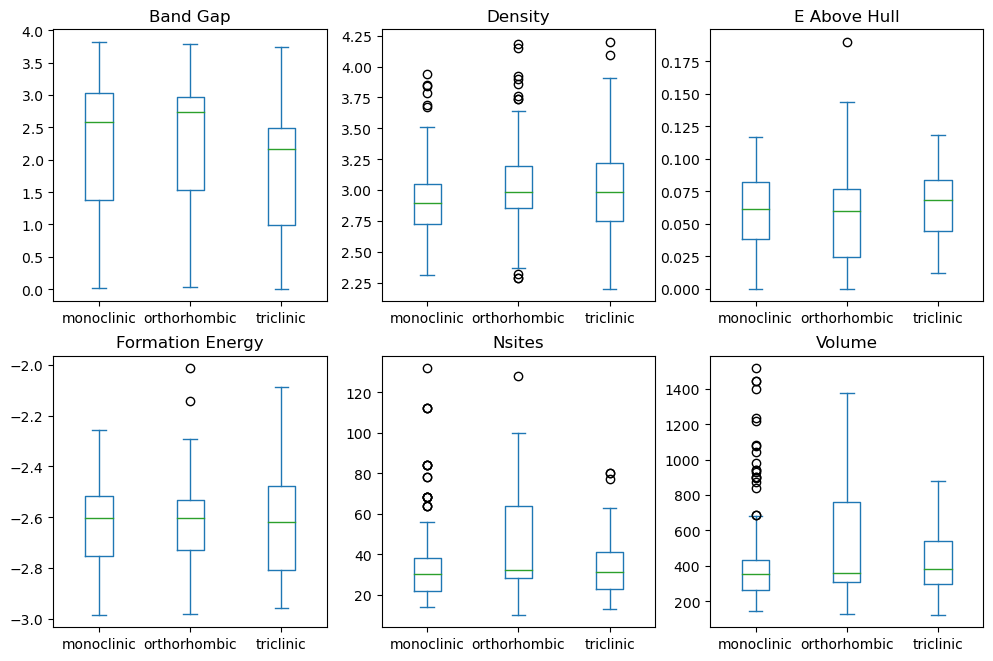

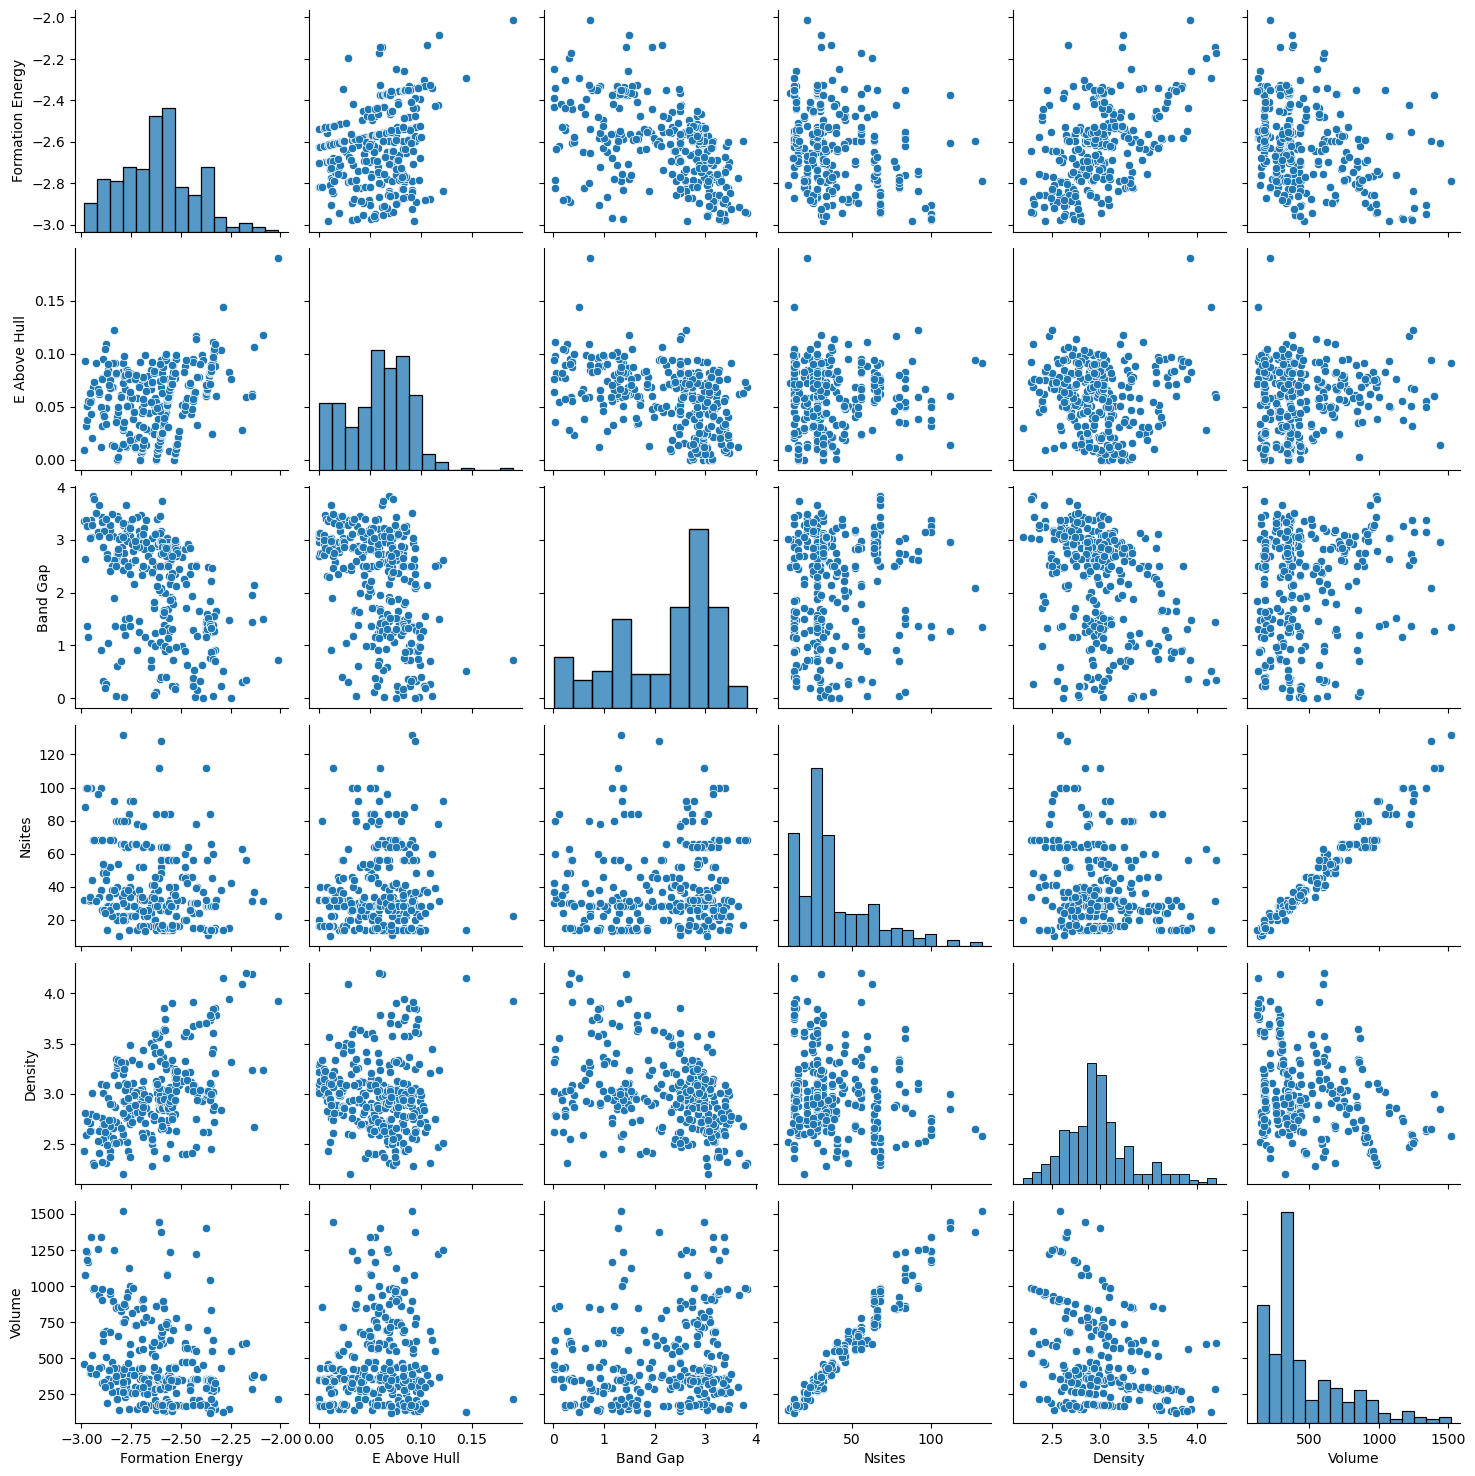

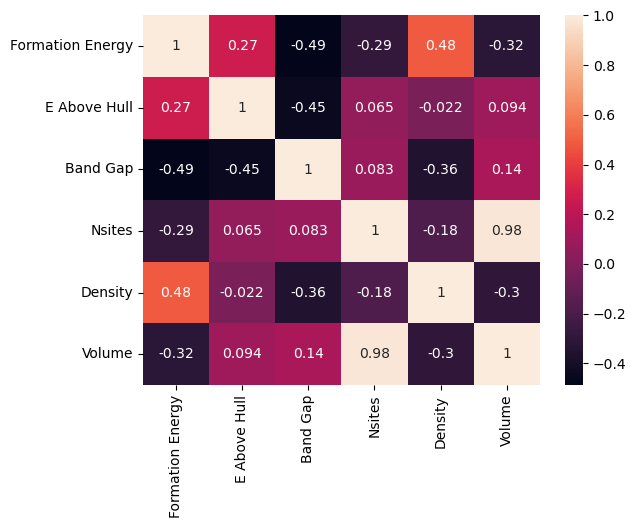

In [315]:
#This code is a modified and extended version of [1]
#Load required libraries
import numpy as np
import pandas as pan
import seaborn as sea
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

#Load the data
df_unclean = pan.read_csv('batteries.csv')
df_unclean.info()

#Explore & describe the data:
#Displaying the DataFrame
#display(df_unclean)
#Shape of the datset (339 rows × 7 columns)

#Print the number of rows:
print("Number of samples is", len(df_unclean),'\n')

#Types
print (df_unclean.dtypes)

print(df_unclean.describe(),'\n')
#Per the target classes
print(df_unclean.groupby("Crystal System").describe(),'\n')

#Check unique values of each row for each column
n = df_unclean.nunique(axis=0)
 
print(f'Number of unique values in each column:\n{n}\n')

#Check unique values of each row for each column
n1 = df_unclean["Crystal System"].nunique()
 
print("Number of unique classes of Crystal System variable:",n1,'\n')

#read_csv() consider '', 'NaN', 'null', etc., as missing values by default and replace them with nan
#ref[2]
#This is why we only will search for nan
#Counting NaN values in the data
nan_count = df_unclean.isna().sum() #or df.isnull().sum()

print(f'Number of missing values in each varaible :\n{nan_count}\n')

#Handling the missing data by removing all rows that contains missing values
df=df_unclean.dropna(how='any')
#display(df)

#Print the number of rows of the clean data:
print("Number of samples is", len(df),"after deleting the missing values",'\n')

print(df_unclean.describe(),'\n')
#We notice that there are zero values in column band gap & E Above Hull using describe()
#In the minimum values
#This may be a result of rounding error
#Band gap has to be more than 0. 
#We count how many zeros are there?
#The number of value zeros in column band gap 
print(f'Number of value zeros in column band gap: {len(df_unclean[df_unclean["Band Gap"]==0])}')

# count occurrences 'Crystal System' column
occur = df.groupby(['Crystal System']).size()
occur1 = df.groupby(['Crystal System']).size()/len(df)
 
# display occurrences & probabilities of 'Crystal System' column
print(f'Counts of Crystal System classes\n{occur}\n')
print(f'Probabilities of Crystal System classes\n{occur1}\n')

#Correcting the unexpected zero values in E Above Hull column and Band Gap column
#Create a Boolean mask
mask1 = df['Band Gap'] == 0
#Replace values based on the mask
df.loc[mask1, 'Band Gap'] = df['Band Gap'].median()
print(f'Number of 0 values in Band Gap column: {len(df[df["Band Gap"] == 0])}\n')

#Data visulaization to understand the data
df.plot.box(column= ["Formation Energy","E Above Hull","Band Gap","Nsites","Density","Volume"],by='Crystal System',  layout=(3,3),figsize = (12,12))
sea.pairplot(df)
#sea.pairplot(df, hue='Crystal System')
plt.show()
#Distinguish variable x to display matrix correlation
Dropped_df = df.drop('Crystal System', axis = 1)
#Display matrix correlation
correlation = Dropped_df.corr()
sea.heatmap(correlation, annot=True)

#Create X & y
#High correlation between volume and nsites, we can use only one of them
Dropped_df = Dropped_df.drop('Volume', axis=1)
X = Dropped_df.to_numpy()

#Converts the dataframe to a numpy array.
y = df['Crystal System'].to_numpy()
#Encode the target variable as integer
ground_truth = {'monoclinic':0,
           'orthorhombic':1,
           'triclinic':2}
#Replace the crystal system with the encoded values
y = df['Crystal System'].replace(ground_truth)

**TESTING CELL**

In [316]:
assert(len(X.shape) == 2)
assert(len(y.shape) == 1)
assert(X.shape[0] == y.shape[0])

**ANSWER CELL**

Before cleaning the dataset, the size of the data was 339 samples and 7 variables. Examining the type of these variables showed that there were six numeric variables and one categorical variable. The six features were: Formation Energy, E Above Hull, Band Gap, Nsites, Density, and Volume. Examining the unique values for all variables showed that there were three unique classes for the "Crystal System". The three distinct target classes were monoclinic, orthorhombic, and triclinic. The percentages of classes: monoclinic, orthorhombic were around 40%, whereas the percentage of class triclinic was 20% in the data.

Given that the method read_csv() consider '', 'NaN', 'null', etc., as missing values by default [2] We searched for the missing values in the dataset using isna(). We also tried isnull() which gave the same results. There were five missing values, one in Formation Energy, two in Band Gap and two in Density. We handle these missing values by deleting all the rows that have missing values using the function dropna(). We checked after this the new data and five rows were deleted from the original data. The descriptive statistics showed that variables 'E Above Hull' and 'Band Gap' have minimum values of 0. By definition, the zero value of E hull indicates the most stable phase at a given composition [3]. However, Band Gap is defined as the minimum amount of energy required for an electron to break free of its bound state [4]. So by definition it must be more than zero. The mistake possibly due to a rounding error. A simple method of replacing the values of zeros by the median in this variable was carried out by creating a Boolean mask and then replace the zero values based on the mask by the median.

Apart from "Volume" and "Nsites" variables, checking the descriptive statistics of the data using describe() showed that the mean and the median for all features were close which may indicate that these variables are roughly normaly distibuted. Checking the pairplot of these features showed that "Volume" and "Nsites" varaibles have right-skewed histograms. However, the boxplot showed that the "Nsites" variable has less outlier values than "Volume" variable. The variable "Volume" was dropped from the data as the correlation matrix showed a very strong correlation with "Nsites" variable (around 98%) in order to avoid any multicollinearity problem in the analysis. Volume variable was chosen to be dropped over nsites because of the more outliers and more skewed shape of its distirbution than that of nsites. The variable X was created as a 2D numpy.array to contain all the samples and their features from the dataset, one sample per row using to_numpy(). The variable y was created as a 1D numpy.array to contain the ground truth (class) as given in the 'Crystal System' after encoding the class as an integer number using replace().

## Simple classification model

To get the feel for the dataset, the first step will be to build train a simple classification model for this dataset. Do this in two steps detailed below:
1. Set aside some data for training and for testing.
2. Train a simple classifier on this data.

### Creating a training and testing set

**Set aside 20\% of the data for testing, and use the remaining 80\% to train your model.** Make sure to fix any random seeds if you use any functions or methods relying on those, so your experiments are _fully repeatable_. Initialise the following variables:
- `X_train` should contain the features corresponding to your training data.
- `y_train` should contain the ground truth of your training data.
- `X_test` should contain the features corresponding to your testing data.
- `y_train` should contain the ground truth associated to your testing data.

_Note:_ No additional marks will be rewarded for implementing an advanced data splitting strategy on this task. The purpose of this task is to start working with the dataset by applying a simple approach; you will have the chance to implement more complex evaluation pipelines in a later task.

Provide your implementation in the **SOLUTION CELL (a)** below. A correct solution should result in no errors when running the **TESTING CELL** provided.

### Training a classifier

**Train a simple classifier,** (of your choosing) **with fixed parameters** on the dataset, and **calculate accuracy on the test set**.
- Define a function `model_accuracy(y_test, y_pred)` to compare the ground truth given in `y_test` to predictions given in `y_pred` and calculate accuracy.
- **Store the model** in the variable named `model`. For the model, you may chose any classifier with which you are familiar (e.g. K Nearest Neighbours), or implement your own classifier. Make sure you **train your model** using the _training data_ only (`X_train`, `y_train`).
- Use the model to **predict the classes of the data** in the testing set (`X_test`), and calculate the accuracy by comparing the predictions with the ground truth for the testing set (`y_test`). **Store the predictions** in a variable called `y_test`.

_Note:_ Do not implement an advanced strategy to chose the parameters of your classifier here, as that will be a topic of a latter question.

_Note:_ If you implement your own classifier, make sure you implement it as a _class_ following the _sklearn_ standard for classifiers (i.e. make sure it implements the `fit(X, y)` method to train the model, and `predict(X)` method to use the trained model to predict the classes of provided samples.


**Discuss the advantages and shortcomings** of the evaluation strategy implemented through this task. Discuss both the data split used for evaluation and the choice of metric. Taking into account the information you know about the dataset, what kind of accuracy scores can you expect on this dataset from a good and bad performing model? Based on the information you have so far, comment on the performance of the model you have trained on the provided dataset.

Provide your implementation in the **SOLUTION CELL (b)** below. The **TESTING CELL** below should run without errors and will print the prediction of your model for the first sample in the test set, and the accuracy as calculated by your `model_accuracy` function. Provide your discussion in the **ANSWER CELL** below.

**SOLUTION CELL (a)**

In [317]:
from sklearn.model_selection import train_test_split
#Reproduce the same train test split each time we run the code
random_state = 50
#Split the data into train and test parts
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, shuffle = True, random_state = random_state)

**TESTING CELL**

In [318]:
assert(X_train.shape[0] == y_train.shape[0])
assert(X_test.shape[0] == y_test.shape[0])
assert(X_train.shape[1] == X_test.shape[1])

**SOLUTION CELL (b)**

In [319]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
#Support vector machine method
from sklearn.svm import SVC

#Function to calulate the accuracy
def model_accuracy(y_test, y_pred):
    accuracy = 0
    a1= np.sum(y_test == y_pred)
    a2= len(y_test)
    accuracy= round(100*a1/a2,2)
    return accuracy

#Create a support vector machine model
#Radial Basis Function (RBF) kernel SVM
model = SVC(gamma="auto",C=4)

#Train the model
model.fit(X_train, y_train)

#Make predictions on the test set
y_predictions = model.predict(X_test)

accuracy = model_accuracy(y_test, y_predictions)
print(f'Accuracy = {accuracy}%')

#Checking the function is working ok using ready function
#Evaluate the model's accuracy
accuracy_check = round(100*accuracy_score(y_test, y_predictions),2)
print(f'Accuracy_check = {accuracy_check}%')

Accuracy = 58.21%
Accuracy_check = 58.21%


**TESTING CELL**

In [320]:
print(model.predict(X_test[0].reshape(1,-1)))
print(model_accuracy(y_test, y_predictions))

[1]
58.21


**ANSWER CELL**

The assessment strategy implemented in this task depends only on accuracy. Accuracy is calculated as the number of correct predictions divided by the total number of predictions made by the model [5]. Classification accuracy is the popular metric for evaluating classification models [6]. The reason for this popularity is that it is easy to calculate, easy to interpret, and is a single number to summarize the model’s capability. However, when the class distribution is noticeably skewed, accuracy can become an unreliable measure of model performance because it is centered around the most common target class. We shown earlier that the percentages of classes: monoclinic, orthorhombic were double of that for class triclinic. So we do have imbalance data, and the accuracy metric is not ideal for this data. Other more appropriate metrics such as G-mean, balanced accuracy, recall, and precision should be used in this case.

Moreover, only one test set was used to validate the model and one train set to build the model. Compared to a single validation set (test set), k-fold cross-validation avoids over-fitting to a fixed validation set and makes better use of the available data by utilizing the entire training set across the folds [7]. It provides an estimate of the performance of the model on new data, which is important for assessing the model's generalizability. So, a better strategy would be to use cross-validation, which would allow the model to be trained on all the data, and the accuracy score would be more stable as it would be averaged over multiple iterations of the cross-validation [1]. The current accuracy of the model is around 58%, which is a low accuracy (close to a random classification of 50%). This low accuracy may be due to the small data size, and the imbalance of the data. A good accuracy score should above 70%. 

## Improved evaluation strategy

After discussing the shortcomings of the simple evaluation strategy used in the previous task, you now have a chance to **propose a better evaluation strategy.** Make sure your chosen strategy **uses all the samples in the dataset** to report the result.
- Implement a function `evaluate_model(model, X, y)` to implement your proposed evaluation strategy. The function should evaluate the model given in `model` on the dataset given by `X` with ground truth given by `y`. Note that the function should be passed the _whole of the dataset_ (see **TESTING CELL** below) and should take care of any data splitting internally.
- If desired, you may add additional arguments to this function, as long as they have default values and the function runs correctly when called using those default values.
- The function should return no values, but instead print the results of the evaluation in a human-readable format.
- Include at least one summative metric (providing a single number, e.g. accuracy) and per-class metric (e.g. precision). You are encouraged to select more than one metric of each type.

This function will be used to provide a better evaluation of the simple model with fixed parameters used in the previous task.

**Discuss your chosen evaluation strategy**, including both the data split and the evaluation metrics. Which data splitting strategy did you chose and why? Which metrics did you chose, and why? Briefly explain the chosen data splitting strategy. What additional information can your additional metrics provide beyond accuracy?

Provide your implementation of this function in the **SOLUTION CELL**. You may also include any additional evaluation calls you want to include in this code cell. The **TESTING CELL** will perform a basic evaluation of your `model` using the `evaluate_model` function implemented for this task. Provide your discussion in the **ANSWER CELL** below.

**SOLUTION CELL**

In [321]:
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import classification_report, balanced_accuracy_score, precision_score
#from imblearn.metrics import geometric_mean_score # did not work ...display an error
#print('The geometric mean is {}'.format(geometric_mean_score(y, y_pred)))


def evaluate_model(model, X, y):
    print(f'Model Evaluation of {type(model).__name__} Method')
  
    #Cross validation 10-fold stratified for model evaluation
    stratifiedkfold = StratifiedKFold(shuffle=True, n_splits=10,  random_state=random_state)
    y_pred = cross_val_predict(model, X, y, cv=stratifiedkfold)
    summary = classification_report(y, y_pred, target_names=['monoclinic','orthorhombic','triclinic'])
    
   
    print(summary)
    #Calculate metrics for each label, and find their unweighted mean. 
    #This does not take label imbalance into account.
    print(f'Balanced Accuracy: {round(balanced_accuracy_score(y, y_pred),2)}')
    print(f'Precision: {precision_score(y, y_pred, average="macro"):.2f}')

**TESTING CELL**

In [322]:
evaluate_model(model, X, y)

Model Evaluation of SVC Method
              precision    recall  f1-score   support

  monoclinic       0.61      0.67      0.64       137
orthorhombic       0.68      0.71      0.69       126
   triclinic       0.52      0.38      0.44        71

    accuracy                           0.62       334
   macro avg       0.60      0.59      0.59       334
weighted avg       0.62      0.62      0.62       334

Balanced Accuracy: 0.59
Precision: 0.60


**ANSWER CELL**

Because the data is small and imbalanced, we used stratified K-Folds cross-validation to split the data. The model per this method is trained on all the data, and the data splits into folds where each fold has the same proportion of observations with a given categorical value, such as the class outcome value [8]. The accuracy score is averaged over multiple iterations (10 folds) of the cross-validation. The metrics chosen for this imballanced data were balanced accuracy, precision, recall and f1-score. The balanced accuracy is the average between the sensitivity and the specificity, which measures the average accuracy obtained from both the minority and majority classes [9]. Precision is the ratio between the true positives and all the points that are classified as positives [10]. Recall score represents the model’s ability to correctly predict the positives out of actual positives [11]. F1 score is the harmonic mean of precision and recall and is a better measure than accuracy [12]. All the performance metrics have increased slightly compared to the simple evaluation strategy, for example the balanced accuracy is 59% compared to the accuracy in the last simple evaluation strategy (58%). Nonetheless, the metrics are now more reliable performance measures for the model performance taking into account all the target classes. 

## Different models and parameter search

Now that you have a [better evaluation strategy](#Improved-evaluation-strategy) implemented, it is time to try out different models, and try out different parameter combinations for these models.

**Fit at least three different (types of) machine learning models** to the provided dataset. (_Note:_ Make sure at least 2 out of your 3 chosen types have different model parameters which can be adjusted). **Try different parameters for all of your models** (which have parameters). Use a single summative metric of your choice to choose between the different types of models, and the models with different parameters. Finally, **choose thee different models, one of each type** and assign them to variables `model_1`, `model_2` and `model_3`.

**Discuss your choice of models, and your procedure to adjust the model parameters**. Discuss how you reached the decision about the best model amongst the models of the same type (which metric was selected, and why). Also discuss any shortcomings of your approach and how (and if) you could improve on this. After evaluating these models on the dataset, **discuss and compare their performance on the provided data.**

Implement your solution in the **SOLUTION CELL**. The **TESTING CELL** will evaluate the three best models selected by you, using your evaluation strategy. Discuss your choices in the **ANSWER CELL**.

**SOLUTION CELL**

In [323]:
#loading libraries
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import matthews_corrcoef
from sklearn.model_selection import GridSearchCV



#Looking for best parameters for suport vector machine  model 
#svc parameters to be tested
svc_param_grid = {
    'C': [0.1,1,12],
    'kernel': ['rbf','sigmoid'],
    'gamma': ['auto','scale']
}
model_1 = SVC(random_state = random_state)
model_1_search_grid = GridSearchCV(model_1, svc_param_grid, scoring='matthews_corrcoef', cv=10, n_jobs=-1)
model_1_search_grid.fit(X, y)
model_1_param_bests = model_1_search_grid.best_params_
print(f'Best Parameters (SVC Method):{model_1_param_bests}')
model_1 = SVC(**model_1_param_bests, random_state = random_state)
model_1.fit(X, y)



#Looking for best parameters for Decision Tree model
#dt parameters to be tested
dt_param_grid = {
    'criterion': ['entropy','gini','log_loss'],
    'splitter': ['random','best'],
    'max_depth': [None,2,3,5,7,9],
    'max_leaf_nodes': [10,20,30,40],
    'max_features': [2,3,4,6]
}
model_2 = DecisionTreeClassifier(random_state = random_state)
model_2_search_grid = GridSearchCV(model_2, dt_param_grid, scoring='matthews_corrcoef', cv=10, n_jobs=-1)
model_2_search_grid.fit(X, y)
model_2_param_bests = model_2_search_grid.best_params_
print(f'Best Parameters (Decision Tree Method):{model_2_param_bests}')
model_2 = DecisionTreeClassifier(**model_2_param_bests, random_state=random_state)
model_2.fit(X, y)



#Looking for best parameters for KNeighbors model
#knn parameters to be tested
knn_param_grid = {
    'n_neighbors': [5],
    'weights': ['distance','uniform'],
    'p': [3,1,2],
    'algorithm': ['auto','ball_tree','kd_tree','brute'],
    'metric': ['minkowski','euclidean','manhattan']
}
model_3 = KNeighborsClassifier()
model_3_search_grid = GridSearchCV(model_3, knn_param_grid, scoring='matthews_corrcoef', cv=10, n_jobs=-1)
model_3_search_grid.fit(X, y)
model_3_param_bests = model_3_search_grid.best_params_
print(f'Best Parameters (KNN Method):{model_3_param_bests}')
model_3 = KNeighborsClassifier(**model_3_param_bests)
model_3.fit(X, y)

Best Parameters (SVC Method):{'C': 12, 'gamma': 'auto', 'kernel': 'rbf'}
Best Parameters (Decision Tree Method):{'criterion': 'entropy', 'max_depth': None, 'max_features': 6, 'max_leaf_nodes': 40, 'splitter': 'random'}
Best Parameters (KNN Method):{'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}


KNeighborsClassifier(p=1, weights='distance')

**TESTING CELL**

In [324]:
evaluate_model(model_1, X, y)
print()
evaluate_model(model_2, X, y)
print()
evaluate_model(model_3, X, y)

Model Evaluation of SVC Method
              precision    recall  f1-score   support

  monoclinic       0.60      0.61      0.61       137
orthorhombic       0.64      0.69      0.66       126
   triclinic       0.56      0.46      0.51        71

    accuracy                           0.61       334
   macro avg       0.60      0.59      0.59       334
weighted avg       0.61      0.61      0.61       334

Balanced Accuracy: 0.59
Precision: 0.60

Model Evaluation of DecisionTreeClassifier Method
              precision    recall  f1-score   support

  monoclinic       0.53      0.69      0.59       137
orthorhombic       0.68      0.57      0.62       126
   triclinic       0.45      0.31      0.37        71

    accuracy                           0.56       334
   macro avg       0.55      0.52      0.53       334
weighted avg       0.57      0.56      0.56       334

Balanced Accuracy: 0.52
Precision: 0.55

Model Evaluation of KNeighborsClassifier Method
              precision    

**ANSWER CELL**

We used three models. These are K-Nearest Neighbor(KNN), Decision Tree (DT) and Support Vector Machine (SVM). KNN is a data-classification method of estimating the likelihood that a data point will become a member of one group based on what group the data point nearest to it belongs to. It is easy to understand and simple to implement and can naturally handle multi-class cases [13]. Decision Tree has a hierarchical, tree structure, which consists of a root node, branches, internal nodes and leaf nodes [14]. It is very intuitive and easy to understand [15]. SVM is relatively memory efficient [16]. 

Since each of these models has a wide range of parameters to consider, and each model should be trained on all the possible combination of the model parameters, grid search 10-cross validation was performed to select the best combination of parameters per model. GridSearchCV was selected because the small size of the data and because it guarantees chosing the best parameters. 

The parameters were adjusted using the matthews correlation coefficient (MCC). MCC is a statistical tool used to measure the difference between the predicted values and actual values. Its values range from -1 to 1; where a value of 1 represents a 100% correct prediction, 0 represents a 50% random prediction, and -1 represents an inverse prediction [17]. It was chosen because it is appropriate to imbalanced data. 

Comparing the models showed that DT was the model with the overall worest performance (Balanced Accuracy: 0.52, Precision: 0.55). This may be due to the fact that DT models tend to become biased towards the majority class in imbalanced data. Moreover, DT models can easily overfit because it has no inherent mechanism to stop, thereby creating complex decision rules [18].

The SVM model performes better than DT with Balanced Accuracy of 0.59 and Precision of 0.60. However, the f1-score was 0.51 in the triclinic which is significantly lower than the other classes (0.61 and 0.66). KNN was the model with the best performance on the data with Balanced Accuracy of 0.64, Precision of 0.65, and comparable F1-scores among the classes (0.62 to 0.66). Nonetheless, this model’s ability to correctly predict the positives out of actual positives was low (recall) in the triclinic class (59%). 

In general, none of the used models have a performance measure that exceed the 70% good classification thershold. One obvious explanation could be; the small size of the dataset. One way to improve the overall performance is to combine different weak classification models.

## Ensembles

Sometimes, combining different weak classification models can improve the overall performance of the model. **Implement bagging** for each of your three classification models (`model_1`, `model_2`, `model_3`) [from the previous task](#Different-models-and-parameter-search). Store your models performing bagging over your based models calculated in the previous task in variables called `bagged_1`, `bagged_2` and `bagged_3`. Provide your implementation, running any additional evaluation needed, in the **SOLUTION CELL**

The **TESTING CELL** will evaluate your 3 bagged models using your own evaluation procedure. It will also make a voting ensemble consisting of your three base models (`model_1`, `model_2`, `model_3`) and another one made of your bagged models (`bagged_1`, `bagged_2` and `bagged_3`), and evaluate these three voting ensembles.

**Discuss** the effect on bagging on your base models. Discuss how you chose the bagging parameters, and justify your choice. Discuss the effect using the voting ensemble had on your model performance. Compare the effect of a voting ensemble on the ensemble models to the effect on the base models. Provide your discussion in the **ANSWER CELL** below.

**SOLUTION CELL**

In [328]:
from sklearn.ensemble import BaggingClassifier

    
   
       
bagged_1 = BaggingClassifier(model_1, n_estimators=25, max_samples=1.0, random_state=random_state, n_jobs=-1)
bagged_1.fit(X, y)

bagged_2 = BaggingClassifier(model_2, n_estimators=25, max_samples=1.0, random_state=random_state, n_jobs=-1)
bagged_2.fit(X, y)

bagged_3 = BaggingClassifier(model_3, n_estimators=25, max_samples=1.0, random_state=random_state, n_jobs=-1)
bagged_3.fit(X, y)


BaggingClassifier(estimator=KNeighborsClassifier(p=1, weights='distance'),
                  n_estimators=25, n_jobs=-1, random_state=50)

**TESTING CELL**

In [329]:
from sklearn.ensemble import VotingClassifier

eclf  = VotingClassifier(estimators=[('CLF1', model_1), ('CLF2', model_2), ('CLF3', model_3)], voting='hard')
ebclf  = VotingClassifier(estimators=[('BCLF1', bagged_1), ('BCLF2', bagged_2), ('BCLF3', bagged_3)], voting='hard')

evaluate_model(bagged_1, X, y)
print()
evaluate_model(bagged_2, X, y)
print()
evaluate_model(bagged_3, X, y)
print()
evaluate_model(eclf, X, y)
print()
evaluate_model(ebclf, X, y)

Model Evaluation of BaggingClassifier Method
              precision    recall  f1-score   support

  monoclinic       0.60      0.59      0.59       137
orthorhombic       0.64      0.71      0.67       126
   triclinic       0.56      0.46      0.51        71

    accuracy                           0.61       334
   macro avg       0.60      0.59      0.59       334
weighted avg       0.60      0.61      0.60       334

Balanced Accuracy: 0.59
Precision: 0.60

Model Evaluation of BaggingClassifier Method
              precision    recall  f1-score   support

  monoclinic       0.53      0.57      0.55       137
orthorhombic       0.59      0.68      0.63       126
   triclinic       0.56      0.32      0.41        71

    accuracy                           0.56       334
   macro avg       0.56      0.53      0.53       334
weighted avg       0.56      0.56      0.55       334

Balanced Accuracy: 0.53
Precision: 0.56

Model Evaluation of BaggingClassifier Method
              precisi

**ANSWER CELL**

The number of estimators chosen for the bagging classification was 25, this was an acceptable number of subsets the model will be trained on. Since the dataset was small, choosing this number was not computationally expensive. Also, for the same reason the max_samples parameter was set to 1.0 so each estimator can be exposed to the whole dataset. The f1 score has slightly increased for triclinic class in Dt Method (0.37 to 0.41) only.

DT model overall balanced accuracy and presision were increased slightly (0.52 to 0.53, and 0.55 to 0.56 repectively). SVM model overall balanced accuracy and presision stay the same. The overall balanced accuracy for KNN reduced from 0.64 to 0.6 while its presision decreased from 0.65 to 0.62. 

The voting ensemble effect on the base models was siginficant with Balanced Accuracy of 0.61
and Precision of 0.63 when compared to that of DT base model (Balanced Accuracy of 0.52
and Precision of 0.55). The voting ensemble effect on the bagged models were also noticible with Balanced Accuracy of 0.58 and Precision of 0.61 when compared to that of DT base model (Balanced Accuracy of 0.53, and Precision of 0.56). 

The recall for the triclinic class in the three base models was in the range of 0.31 to 0.59. The recall for the triclinic class in the three bagged models was in the range of 0.32 to 0.48. The recall for the triclinic class in the voting ensemble on the base and bagged models was 0.49, 0.44 repectively. Clearly combining these three models means the voting ensemble will choose the majority vote which will be the two models (SVM, KNN) that perform better on the minority class, explaining the increase from that recall score in DT model. Compared to DT f1 score, same conclusion is reached with regards to f1 score in the voting ensemble effect on the base and bagged models.


## Final model evaluation

Based on all the experiments performed for this assessment, **choose a single best model, evaluate it** with [your evaluation procedure](#Improved-evaluation-strategy) and also **display the confusion matrix**. **Discuss the performance achieved by this model**.

**You should attempt this cell even if you have not successfully trained all the models required in this assessment, and comment on the best model which _you_ have obtanied.**

Implement your solution in the **SOLUTION CELL** below. Add your discussion to the **ANSWER CELL** below.

**SOLUTION CELL**

Model Evaluation of KNeighborsClassifier Method
              precision    recall  f1-score   support

  monoclinic       0.64      0.64      0.64       137
orthorhombic       0.64      0.67      0.66       126
   triclinic       0.66      0.59      0.62        71

    accuracy                           0.64       334
   macro avg       0.65      0.64      0.64       334
weighted avg       0.64      0.64      0.64       334

Balanced Accuracy: 0.64
Precision: 0.65



Text(0.5, 1.0, 'Confusion Matrix of KNN Method')

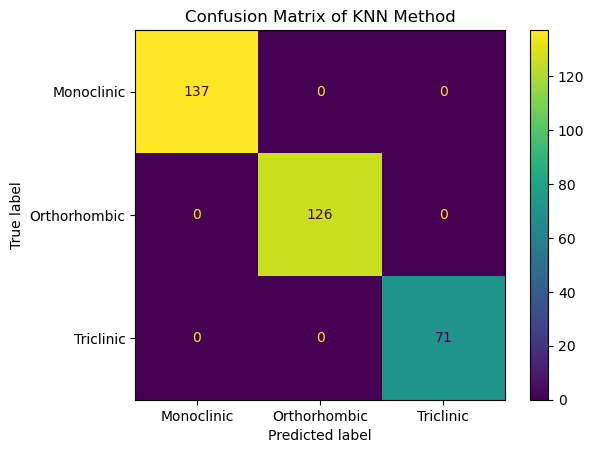

In [330]:
#Import Libraries
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

evaluate_model(model_3, X, y)
print()

y_pred = model_3.predict(X)
y_ = y_test

KNN = confusion_matrix(y, y_pred)
labels = ['Monoclinic', 'Orthorhombic', 'Triclinic']
display = ConfusionMatrixDisplay(KNN, display_labels=labels)

display.plot()
plt.title("Confusion Matrix of KNN Method")

**ANSWER CELL**

The overall accuracy and presion of KNN was the highest among the models (Balanced Accuracy: 0.64
Precision: 0.65). And same is true with regards to its recall and f1 score for the triclinic class( recall: 0.59, f1 score: 0.62). This is much better than the original SVM model with Balanced Accuracy of 0.59, Precision of 0.60, and for the triclinic class a recall of 0.38, and f1 score of 0.44. The overall accuracy did not exceed the 70% threshold and this may be because of the samll size of the data and the imbalanced issue with the target classes. Comaping the target classes, we can see that this model has the highest ability to correctly predict the positives out of actual positives in the orthorhombic class (0.67). Same conclusion is true with regards to the f1 score.

## References

[1] GitHub: Teddiex, "CMP3751M-Machine-Learning", https://github.com/Teddiex/CMP3751M-Machine-Learning/blob/master/Assessment%202/CMP3751M_Machine_Learning.ipynb, 2024, (accessed 11/01/2024)

[2] "Missing values in pandas (nan, None, pd.NA)", https://note.nkmk.me/en/python-pandas-nan-none-na/, 2023, (accessed 14/01/2024)

[3] Lakshya Mathur, In-Ho Kim, Aman Bhardwaj, Bhupendra Singh, Jun-Young Park, Sun-Ju Song, "Structural and electrical properties of novel phosphate based composite electrolyte for low-temperature fuel cells", https://doi.org/10.1016/j.compositesb.2020.108405, 2020, (accessed 15/01/2024)

[4] Christiana Honsberg, Stuart Bowden, "Band Gap", https://www.pveducation.org/pvcdrom/pn-junctions/band-gap, (accessed 14/01/2024)

[5] Aniruddha Bhandari, "Understanding & Interpreting Confusion Matrix in Machine Learning", https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/#:~:text=How%20is%20accuracy%20calculated%20from,predictions%20made%20by%20the%20model, 2024, (accessed 17/01/2024)

[6] Jason Brownlee, "Failure of Classification Accuracy for Imbalanced Class Distributions", https://machinelearningmastery.com/failure-of-accuracy-for-imbalanced-class-distributions/, 2021, (accessed 17/01/2024)

[7] stackoverflow: Scriddie, "Is k-folds cross validation a smarter idea than using a validation set instead?", https://stackoverflow.com/questions/72361384/is-k-folds-cross-validation-a-smarter-idea-than-using-a-validation-set-instead#:~:text=Compared%20to%20a%20single%20validation,albeit%20at%20greater%20computational%20cost, 2022, (accessed 17/01/2024)

[8] Jason Brownlee, "A Gentle Introduction to k-fold Cross-Validation", https://machinelearningmastery.com/k-fold-cross-validation/#:~:text=Stratified%3A%20The%20splitting%20of%20data,is%20called%20stratified%20cross%2Dvalidation, 2023, (accessed 17/01/2024)

[9] Josephine S Akosa, "Predictive Accuracy: A Misleading Performance Measure for Highly
Imbalanced Data", https://support.sas.com/resources/papers/proceedings17/0942-2017.pdf, 2017, (accessed 17/01/2024)

[10] Abhishek Wasnik, "Precision and Recall in Python", https://www.askpython.com/python/examples/precision-and-recall-in-python, 2021, (accessed 17/01/2024)

[11] Ajitesh Kumar, "Accuracy, Precision, Recall & F1-Score – Python Examples", https://vitalflux.com/accuracy-precision-recall-f1-score-python-example/, 2023, (accessed 17/01/2024)

[12] Harikrishnan N B, "Confusion Matrix, Accuracy, Precision, Recall, F1 Score", https://medium.com/analytics-vidhya/confusion-matrix-accuracy-precision-recall-f1-score-ade299cf63cd, 2019, (accessed 17/01/2024)

[13] Amal Joby, "K Nearest Neighbor or KNN Algorithm And It's Essence in ML", https://learn.g2.com/k-nearest-neighbor, 2023, (accessed 18/01/2024)

[14] IBM, "What is a Decision Tree?", https://www.ibm.com/topics/decision-trees#:~:text=A%20decision%20tree%20is%20a,internal%20nodes%20and%20leaf%20nodes, (accessed 18/01/2024)

[15] Dhiraj K, "Top 5 advantages and disadvantages of Decision Tree Algorithm" https://dhirajkumarblog.medium.com/top-5-advantages-and-disadvantages-of-decision-tree-algorithm-428ebd199d9a, 2019, (accessed 18/01/2024)

[16] Dhiraj K, "Top 4 advantages and disadvantages of Support Vector Machine or SVM", https://dhirajkumarblog.medium.com/top-4-advantages-and-disadvantages-of-support-vector-machine-or-svm-a3c06a2b107, 2019, (accessed 18/01/2024)

[17] Grandini, M., Bagli, E., & Visani, G., "Metrics for Multi-Class Classification: an Overview ArXiv, abs/2008.05756", https://doi.org/10.48550/arXiv.2008.05756, 2020, (accessed 18/01/2024)

[18] Archish Rai Kapil, "Decision Tree Algorithm in Machine Learning: Advantages, Disadvantages, and Limitations", https://www.analytixlabs.co.in/blog/decision-tree-algorithm/, 2022, (accessed 18/01/2024)

[] Divyansh Agrawal: "Crystal System Properties for Li-ion batteries (dataset)", https://www.kaggle.com/datasets/divyansh22/crystal-system-properties-for-liion-batteries/discussion, 2020, (accessed 28/08/2023)

[] Pedregosa et al., "Scikit-learn: Machine Learning in Python", https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV, 2023, (accessed 12/01/2024)

[] Kadriye Aksakal, "Confusion Matrix with KNN Algorithm", https://www.kaggle.com/code/kadriyeaksakal/confusion-matrix-with-knn-algorithm, 2020, (accessed 13/01/2024)

[] Jean-Christophe Chouinard, "What is a Confusion Matrix in Python (Scikit-learn Example)", https://www.jcchouinard.com/confusion-matrix-in-scikit-learn/, 2023, (accessed 13/01/2023)